# Sydney Visit 2026
## Rigorous Adaptive Algorithms for Problems with Randomness 
### Fred J. Hickernell

This demo makes use of our QMCPy software package.  See [qmcpy.org](www.qmcpy.org) for more details.

### Some LaTeX macros (hidden in math mode)
$
\newcommand{\vh}{\boldsymbol{h}}
\newcommand{\vt}{\boldsymbol{t}}
\newcommand{\vx}{\boldsymbol{x}}
\newcommand{\vX}{\boldsymbol{X}}
\newcommand{\cf}{\mathcal{F}}
\newcommand{\cu}{\mathcal{U}}
\newcommand{\dif}{\mathrm{d}}
\newcommand{\Ex}{\mathbb{E}}
\DeclareMathOperator{\disc}{disc}
\newcommand{\norm}[2][{}]{{\left \lVert #2 \right \rVert}_{#1}}
$

#### If are running this notebook in on colab, replace False in the next cell by True

In [2]:
if False:  #Running on colab?
    !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
    !sudo apt install cm-super
    !pip install git+https://github.com/QMCSoftware/QMCSoftware.git@MCQMC2024

### Import needed packages

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import math
import numpy as np
import scipy as sp
import qmcpy as qp
import sympy as sy
#from scipy import stats
#from copy import deepcopy
import time
import timeit
import pickle

#These are parameters needed for figures
figpath = './Figures/' #this path sends the figures to the directory that you want
savefigs = True  #save the figures on your disk if True
imgfrmt = 'pdf' #kind of format to save figures as
long_compute = False #redo the long computations
font_family = "serif"
plt.rcParams.update({
    "font.family" : font_family,
    "text.usetex" : True,  
    "mathtext.fontset" : "dejavuserif",
    "axes.labelsize" : 18,
    "axes.titlesize" : 18,
    "xtick.labelsize" : 14,
    "ytick.labelsize" : 14
})

In [4]:
import matplotlib.colors as mcolors

def lighten_color(color, factor=1.5):
    """Lightens the given color by blending it with white. 
    Factor > 1 makes it lighter, factor < 1 makes it darker."""
    rgb = mcolors.to_rgb(color)  # Convert color to RGB tuple
    lighter_rgb = tuple(min(1, c + (1 - c) * (factor - 1)) for c in rgb)  # Blend with white
    return lighter_rgb

# for plotting, here are our different symbols and their colors
# because plots may be printed in black and white we want different colors to have different marker shapes 
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  #get the color cycle
[py_blue, py_orange, py_green, py_red, py_purple, py_brown, py_pink, py_gray, py_yellow, py_cyan] = color_cycle[0:10]
blue_symbol = {"color" : py_blue,
               "marker" : ".",
               "markersize" : 15,
               "linestyle" : ""
               }
orange_symbol = {"color" : py_orange,
               "marker" : "d",
               "markersize" : 12,
               "linestyle" : ""
               }
green_symbol = {"color" : py_green,
               "marker" : "s",
               "markersize" : 10,
               "linestyle" : ""
               }
red_symbol = {"color" : py_red,
               "marker" : "^",
               "markersize" : 10,
               "linestyle" : ""
               }
purple_symbol = {"color" : py_purple,
               "marker" : "v",
               "markersize" : 10,
               "linestyle" : ""
               }
brown_symbol = {"color" : py_brown,
               "marker" : ">",
               "markersize" : 10,
               "linestyle" : ""
               }
pink_symbol = {"color" : py_pink,
               "marker" : "<",
               "markersize" : 10,
               "linestyle" : ""
               }
symbol_args=[blue_symbol,orange_symbol,green_symbol,red_symbol,purple_symbol,brown_symbol,pink_symbol]

#lighter or darker versions of colors
lighter_py_blue = lighten_color(py_blue, factor=1.5)


## Different LD Sequences

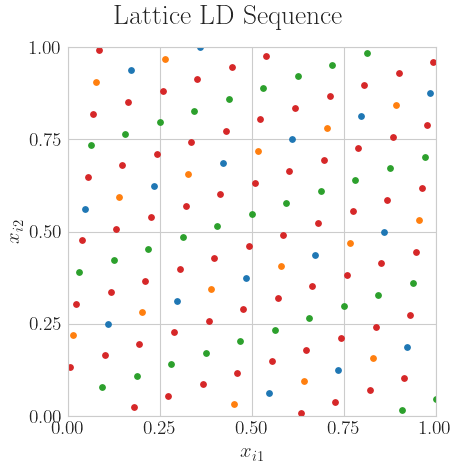

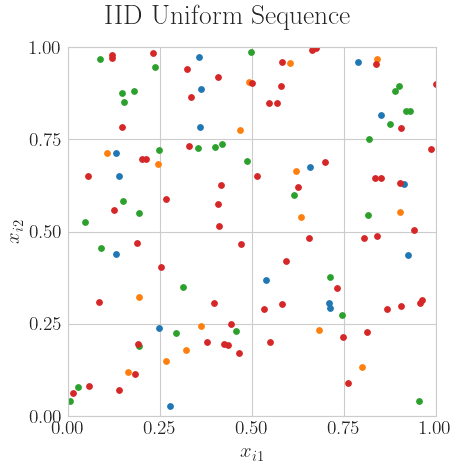

In [5]:
nvec = np.array([16, 32, 64, 128])
dvec=np.array([2])
fig, ax = qp.plot_proj(qp.Lattice(4), n = nvec, d_horizontal = 1, d_vertical = np.array([2]),math_ind = True, marker_size = 15, figfac = 5*dvec.size, \
              fig_title = 'Lattice LD Sequence', axis_pad = 0, want_grid = True, font_family = "serif", \
                where_title = 0.95);
fig.savefig(figpath+f"Lattice."+imgfrmt,format=imgfrmt,bbox_inches='tight')

fig, ax = qp.plot_proj(qp.IIDStdUniform(4), n = nvec, d_horizontal = 1, d_vertical = np.array([2]),math_ind = True, marker_size = 15, figfac = 5*dvec.size, \
              fig_title = 'IID Uniform Sequence', axis_pad = 0, want_grid = True, font_family = "serif", \
                where_title = 0.95);
fig.savefig(figpath+f"Uniform."+imgfrmt,format=imgfrmt,bbox_inches='tight')

## Bad lattices

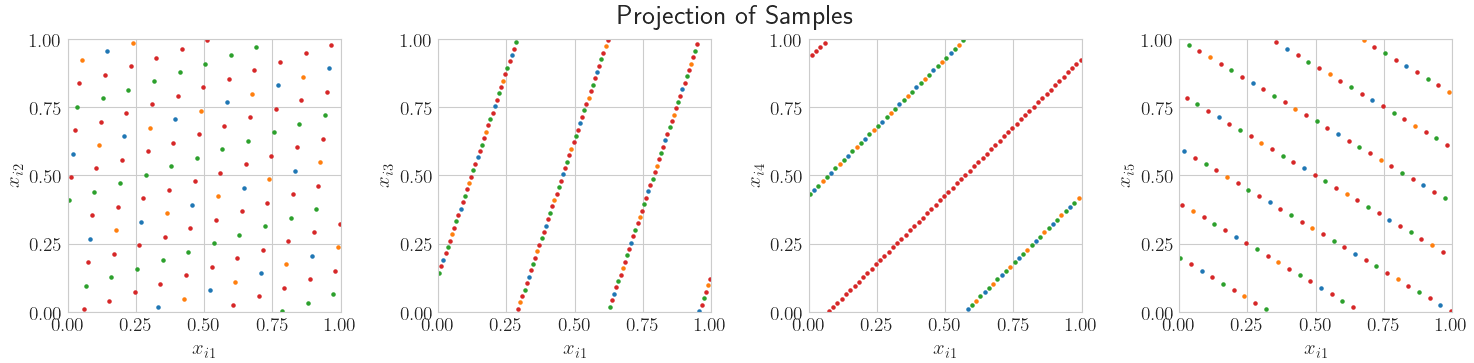

In [6]:
d = 5
qp.plot_proj(qp.Lattice(d), n = [16,32,64,128], d_horizontal = 1, d_vertical = [2,3,4,5],math_ind = True, marker_size = 5, figfac = 15, \
              fig_title = 'Projection of Samples', axis_pad = 0, want_grid = True, font_family = "sans-serif", \
                where_title = 0.525);